# Important Regions in a Spectrum considedered important by the all_data model and the sub_data model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_directory = '/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/'

In [4]:
dps1200 = pd.read_csv(f'{csv_directory}/dps1200.csv')

In [5]:
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)
dps1200 = dps1200.drop(dps1200.columns[1:4], axis=1)

In [6]:
features = dps1200.iloc[:, 1:].values
labels = dps1200.iloc[:, 0].values

In [7]:
test_labels_2d = labels.reshape(-1, 1)
test_data_all = np.concatenate((test_labels_2d, dps1200), axis=1)

sorted_indices = np.argsort(test_data_all[:, 0])
test_all_sorted = test_data_all[sorted_indices]

In [8]:
print(test_all_sorted)

[[ 1.194000e+03  1.194000e+03  1.761669e-02 ... -1.870850e-02
  -1.875145e-02 -1.882741e-02]
 [ 1.202000e+03  1.202000e+03  2.244343e-02 ... -2.387798e-02
  -2.402605e-02 -2.420264e-02]
 [ 1.206000e+03  1.206000e+03  1.675946e-02 ... -1.829274e-02
  -1.833965e-02 -1.842039e-02]
 ...
 [ 2.008000e+03  2.008000e+03  1.819357e-02 ... -2.252935e-02
  -2.254530e-02 -2.258203e-02]
 [ 2.008000e+03  2.008000e+03  1.708295e-02 ... -1.957711e-02
  -1.958914e-02 -1.962385e-02]
 [ 2.009000e+03  2.009000e+03  1.756819e-02 ... -1.705812e-02
  -1.707125e-02 -1.710605e-02]]


In [51]:
# Mask regions that are not present in the dataset to obtain the spectrum plot 
y = test_all_sorted[-1,2:]
x_values = dps1200.columns[1:]
x = dps1200.columns.values
x = x[1:]
x = x.astype(int)

for i in range(1, len(x)):
    diff = x[i-1] - x[i]

    if diff > 10:
        print(f"gap found @ indices {i-1},{i} -> {x[i-1]} vs {x[i]}")
        y[i] = np.ma.masked

gap found @ indices 88,89 -> 2800 vs 1771
gap found @ indices 172,173 -> 1610 vs 1271
gap found @ indices 375,376 -> 881 vs 864


/tmp/ipykernel_5640/692526368.py:12: UserWarning: Warning: converting a masked element to nan.
  y[i] = np.ma.masked


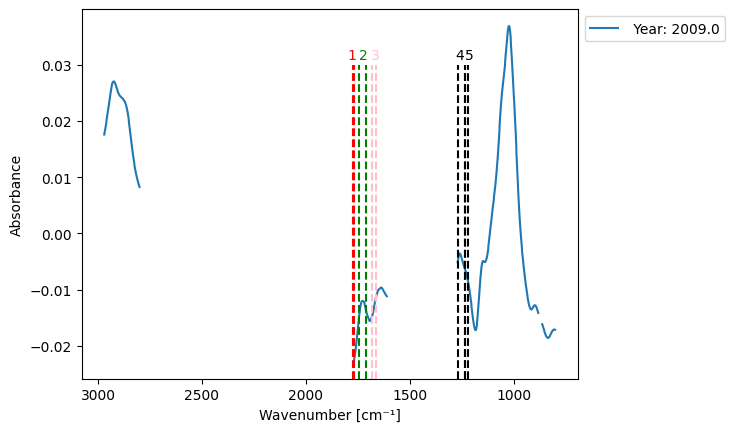

In [54]:
plt.plot(x, y, label=f' Year: {test_all_sorted[-1,0]}')

region1 = "1770-1774"  
plt.axvline(1770, ymax=0.85, color='red', linestyle='--')
plt.text(1800,0.031,'1', color='red')
plt.axvline(1774,ymax=0.85, color='red', linestyle='--') 

region2 = "1742-1711"  
plt.axvline(1742,ymax=0.85, color='green', linestyle='--')
plt.text(1742,0.031,'2', color='green')
plt.axvline(1711,ymax=0.85, color='green', linestyle='--')

region3 = "1680-1664"  
plt.axvline(1680,ymax=0.85, color='pink', linestyle='--')
plt.text(1685,0.031,'3', color='pink')
plt.axvline(1664,ymax=0.85, color='pink', linestyle='--')

region4 = "1265-1234"  
plt.axvline(1265,ymax=0.85, color='black', linestyle='--')
plt.text(1280,0.031,'4', color='black')
plt.axvline(1234,ymax=0.85, color='black', linestyle='--')

region5 = "1234-1219"  
plt.axvline(1234,ymax=0.85, color='black', linestyle='--')
plt.text(1234,0.031,'5', color='black')
plt.axvline(1219,ymax=0.85, color='black', linestyle='--')

plt.gca().invert_xaxis()

plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()